In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
sns.set(style="whitegrid")



In [18]:
df = pd.read_csv('../data/user_behavior_dataset.csv')
print(df.isnull().sum())
df.head()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


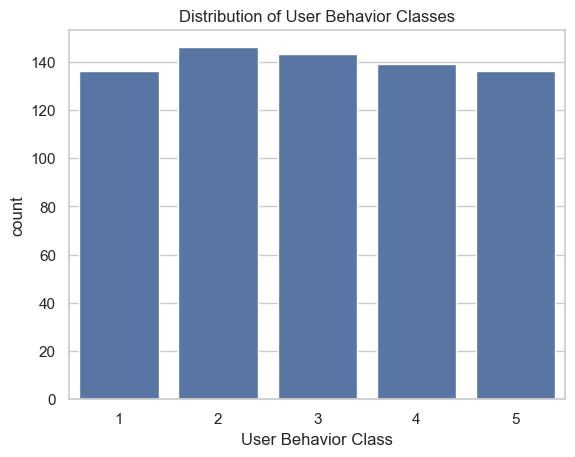

In [19]:
sns.countplot(x='User Behavior Class', data=df)
plt.title('Distribution of User Behavior Classes')
plt.show()

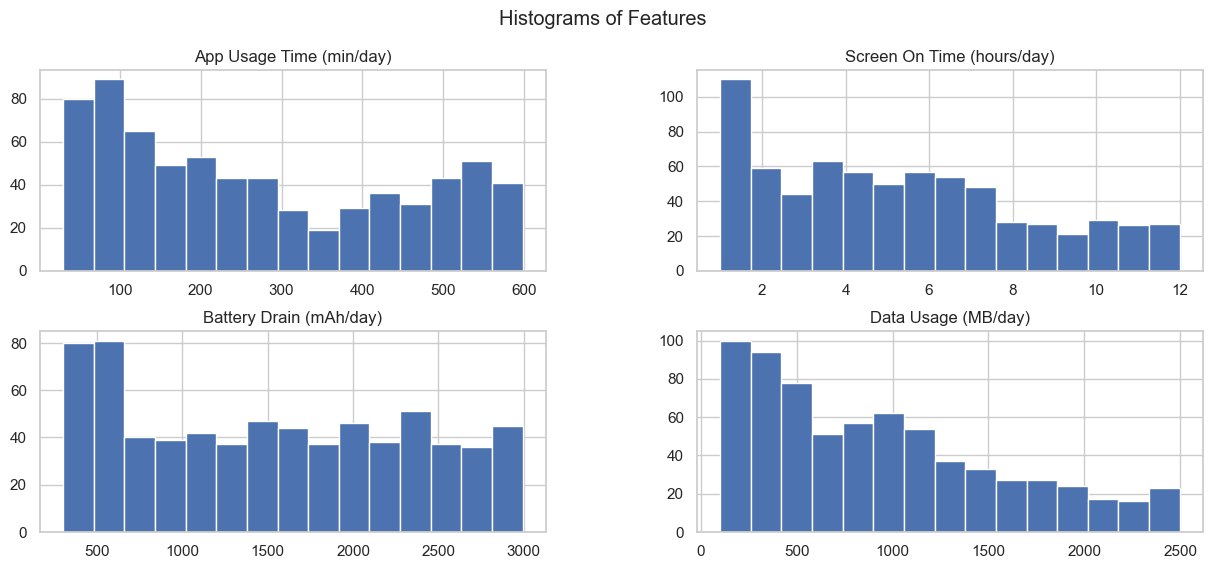

In [20]:
features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']
df[features].hist(bins=15, figsize=(15,6))
plt.suptitle('Histograms of Features')
plt.show()

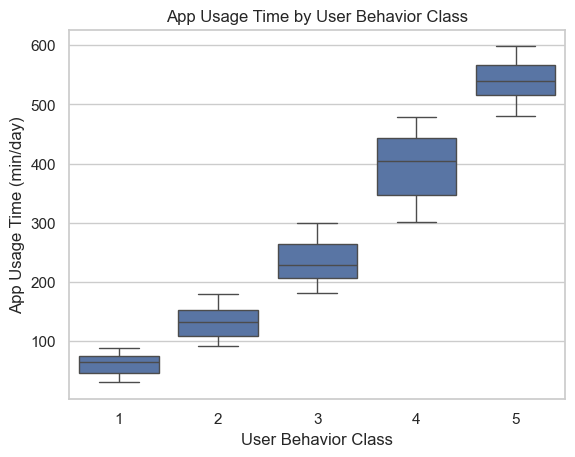

In [21]:
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df)
plt.title('App Usage Time by User Behavior Class')
plt.show()

In [24]:
df['Battery Drain per mAh/hours when screen is on'] = df['Battery Drain (mAh/day)'] / df['Screen On Time (hours/day)']
df['Data Usage (MB/app)'] = df['Data Usage (MB/day)'] / df['Number of Apps Installed']

df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Battery Drain per Screen-On Time,Data Usage per App,Data Usage (MB/app),Battery Drain per mAh/hours when screen is on
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,292.500000,16.746269,16.746269,292.500000
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,283.191489,22.476190,22.476190,283.191489
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,190.250000,10.062500,10.062500,190.250000
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,349.166667,15.553571,15.553571,349.166667
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,317.906977,17.034483,17.034483,317.906977


In [34]:
test_df = df
test_df = pd.get_dummies(df, columns=['Operating System', 'Gender', 'Device Model'])

test_df.head()
test_df

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Battery Drain per Screen-On Time,Data Usage per App,...,Battery Drain per mAh/hours when screen is on,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,1,393,6.4,1872,67,1122,40,4,292.500000,16.746269,...,292.500000,True,False,False,True,True,False,False,False,False
1,2,268,4.7,1331,42,944,47,3,283.191489,22.476190,...,283.191489,True,False,True,False,False,True,False,False,False
2,3,154,4.0,761,32,322,42,2,190.250000,10.062500,...,190.250000,True,False,False,True,False,False,False,True,False
3,4,239,4.8,1676,56,871,20,3,349.166667,15.553571,...,349.166667,True,False,False,True,True,False,False,False,False
4,5,187,4.3,1367,58,988,31,3,317.906977,17.034483,...,317.906977,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,277.435897,14.653846,...,277.435897,False,True,False,True,False,False,False,False,True
696,697,316,6.8,1965,68,1201,59,4,288.970588,17.661765,...,288.970588,True,False,False,True,False,False,False,True,False
697,698,99,3.1,942,22,457,50,2,303.870968,20.772727,...,303.870968,True,False,True,False,True,False,False,False,False
698,699,62,1.7,431,13,224,44,1,253.529412,17.230769,...,253.529412,True,False,False,True,False,False,True,False,False


In [52]:
X = test_df.drop(columns=['User Behavior Class', 'User ID'])
y = test_df['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [54]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [55]:
simple_model = LogisticRegression(max_iter=999999)
simple_model.fit(X_train, y_train)
y_pred = simple_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [56]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

                                          Feature  Importance
2                         Battery Drain (mAh/day)    0.247863
3                        Number of Apps Installed    0.188765
0                        App Usage Time (min/day)    0.184286
4                             Data Usage (MB/day)    0.181837
1                      Screen On Time (hours/day)    0.135353
8                             Data Usage (MB/app)    0.023468
7                              Data Usage per App    0.020434
6                Battery Drain per Screen-On Time    0.007949
9   Battery Drain per mAh/hours when screen is on    0.005513
5                                             Age    0.002164
16                Device Model_Samsung Galaxy S21    0.000582
13                                    Gender_Male    0.000449
12                                  Gender_Female    0.000368
17                      Device Model_Xiaomi Mi 11    0.000231
10                       Operating System_Android    0.000202
11      

In [57]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
